# Accidents Corporels de la Circulation Routière 2016

Source: data.gouv.fr


In [1]:
import os
os.sys.path  # Répertoires où sont cherchés les modules
#os.getcwd() # Répertoire de travail

['',
 '/home/11942h/AccidentsCorporelsCirculationRoutiere',
 '/produit/anaconda/anaconda353/lib/python37.zip',
 '/produit/anaconda/anaconda353/lib/python3.7',
 '/produit/anaconda/anaconda353/lib/python3.7/lib-dynload',
 '/produit/anaconda/anaconda353/lib/python3.7/site-packages',
 '/produit/anaconda/anaconda353/lib/python3.7/site-packages/IPython/extensions',
 '/home/11942h/.ipython']

In [2]:
### Les packages  
import time
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Les options générales
pd.set_option("display.max_columns", 99) # permet de voir toutes les colonnes


In [3]:
### Chargement des données

#Impossible de charger le fichier caractéristiques avec l'ensemble des colonnes
d1 = pd.read_csv("caracteristiques_2016_col_reduit.csv" #59 432
                 ,sep=','
                 ,header='infer'
                 ,encoding='utf-8')

d2 = pd.read_csv("lieux_2016.csv" #59 432
                 ,sep=','
                 ,header='infer'
                 ,encoding='utf-8')

d3 = pd.read_csv("vehicules_2016.csv" #101 924
                 ,sep=','
                 ,header='infer'
                 ,encoding='utf-8')

d4 = pd.read_csv("usagers_2016.csv" #133 422
                 ,sep=','
                 ,header='infer'
                 ,encoding='utf-8')

/produit/anaconda/anaconda353/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:

### Recodages
#d1 Caractéristiques de l'accident
d1['lum'].value_counts().sort_index()
lum_map = {1:'Plein jour'
           ,2:'Crépuscule ou aube'
           ,3:'Nuit sans éclairage public'
           ,4:'Nuit avec éclairage public non allumé'
           ,5:'Nuit avec éclairage public allumé'
           }
d1['lumiere_c'] = d1['lum'].map(lum_map)
d1.head(10)
d1['lumiere_c'].value_counts().sort_index()

d1['agg'].value_counts().sort_index()
agg_map = {1:'Hors agglomération'
           ,2:'En agglomération'
           }
d1['agglo_c'] = d1['agg'].map(agg_map)
d1['agglo_c'].value_counts().sort_index()

d1['int'].value_counts().sort_index()
int_map = {1:'Hors intersection'
           ,2:'Intersection en X'
           ,3:'Intersection en T'
           ,4:'Intersection en Y'
           ,5:'Intersection à plus de 4 branches'
           ,6:'Giratoire'
           ,7:'Place'
           ,8:'Passage à niveau'
           ,9:'Autre intersection'
           }
d1['intersection_c'] = d1['int'].map(int_map)
d1['intersection_c'].value_counts().sort_index()

d1['atm'].value_counts().sort_index() # Conditions atmosphériques
atm_map = {1:'Normale'
           ,2:'Pluie légère'
           ,3:'Pluie forte'
           ,4:'Neige - grêle'
           ,5:'Brouillard - fumée'
           ,6:'Vent fort - tempête'
           ,7:'Temps éblouissant'
           ,8:'Temps couvert'
           ,9:'Autre'
           }
d1['cond_atm_c'] = d1['atm'].map(atm_map)
d1['cond_atm_c'].value_counts().sort_index()

d1['col'].value_counts().sort_index()
col_map = {1:'Deux véhicules - frontale'
           ,2:'Deux véhicules – par l’arrière'
           ,3:'Deux véhicules – par le coté'
           ,4:'Trois véhicules et plus – en chaîne'
           ,5:'Trois véhicules et plus - collisions multiples'
           ,6:'Autre collision'
           ,7:'Sans collision'
           ,8:'Passage à niveau'
           }
d1['collision_c'] = d1['col'].map(col_map)
d1['collision_c'].value_counts().sort_index()


#d2 Lieux de l'accident
d2.head(10)
d2.columns
d2.describe()

catr_map = {1:'Autoroute'
           ,2:'Route Nationale'
           ,3:'Route Départementale'
           ,4:'Voie Communale'
           ,5:'Hors réseau public'
           ,6:'Parc de stationnement'
           ,9:'autre'
           }
d2['categorie_route_c'] = d2['catr'].map(catr_map)
d2['categorie_route_c'].value_counts().sort_index()

circ_map = {1:'A sens unique'
           ,2:'Bidirectionnelle'
           ,3:'A chaussées séparées'
           ,4:'Avec voies d’affectation variable'
           }
d2['circulation_c'] = d2['circ'].map(circ_map)
d2['circulation_c'].value_counts().sort_index()

d2['nbv'].value_counts().sort_index()# Nombre de voies

prof_map = {1:'Plat'
           ,2:'Pente'
           ,3:'Sommet de côte'
           ,4:'Bas de côte'
           }
d2['profil_c'] = d2['prof'].map(prof_map)
d2['profil_c'].value_counts().sort_index()

surf_map = {1:'normale'
           ,2:'mouillée'
           ,3:'flaques'
           ,4:'inondée'
           ,5:'enneigée'
           ,6:'boue'
           ,7:'verglacée'
           ,8:'corps gras - huile'
           ,9:'autre'
           }
d2['etat_surface_c'] = d2['surf'].map(surf_map)
d2['etat_surface_c'].value_counts().sort_index()

infra_map = {0:'Rien'
           ,1:'Souterrain - tunnel'
           ,2:'Pont - autopont'
           ,3:'Bretelle d echangeur ou de raccordement'
           ,4:'Voie ferrée'
           ,5:'Carrefour aménagé'
           ,6:'Zone piétonne'
           ,7:'Zone de péage'
           }
d2['infrastructure_c'] = d2['infra'].map(infra_map)
d2['infrastructure_c'].value_counts().sort_index()

situ_map = {1:'Sur chaussée'
           ,2:'Sur bande d’arrêt d’urgence'
           ,3:'Sur accotement'
           ,4:'Sur trottoir'
           ,5:'Sur piste cyclable'
           }
d2['situation_c'] = d2['situ'].map(situ_map)
d2['situation_c'].value_counts().sort_index()


#d3 Véhicules accidentés

d3.head()
d3.describe()

d3b = d3.groupby(['Num_Acc']).size().reset_index(name='nb_veh')
d3b.head()
d3b['nb_veh'].value_counts().sort_index()


#d4 Usagers

d4.head()
d4.describe()

d4b = d4.groupby(['Num_Acc']).size().reset_index(name='nb_usagers')
d4b.head()
d4b['nb_usagers'].value_counts().sort_index()

d4c = d4[(d4.grav == 2)].groupby(['Num_Acc']).size().reset_index(name='nb_tues')
d4c.head()
d4c['nb_tues'].value_counts().sort_index()



1     3185
2      174
3       27
4        3
5        1
6        2
12       1
Name: nb_tues, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8081086b38>,
      dtype=object)

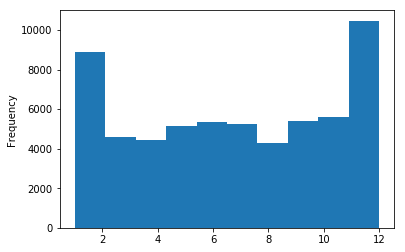

<Figure size 432x288 with 0 Axes>

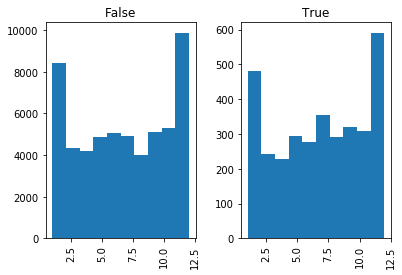

In [5]:

### Constitution du dataframe de travail

# Liste des variables retenus
lv1 = ['Num_Acc','an','mois','jour','lum','agg']
lv2 = ['Num_Acc','catr','circ','prof','surf','infra','situ']

d10 = pd.merge(d1[lv1], d2[lv2]
               ,how='inner'
               ,on='Num_Acc'
               )

d11 = pd.merge(d10, d3b
               ,how='inner'
               ,on='Num_Acc'
               )

d12 = pd.merge(d11, d4b
               ,how='left'
               ,on='Num_Acc'
               )

d13 = pd.merge(d12, d4c
               ,how='left'
               ,on='Num_Acc'
               )

d13.head(10)

#Remplissage des non renseignés
d19 = d13.fillna(0)
d19.head()
d19.describe()
d19['nb_tues'].value_counts().sort_index()

plt.figure()
d19['mois'].plot(kind='hist')

#Pour les besoins de cette étude, il n'y aura pas d'échantillons d'apprentissage et de test
# mais je garde les dénominations _train néanmoins pour la réutilisation des programmes

Y_train = d19['nb_tues'] > 0
pd.crosstab(d19['nb_tues'], Y_train) # Vérification du recodage

var_num = d19.columns.tolist() # Il n'y a que des variables numériques par construction
var_num
var_num = [e for e in var_num if e not in ('Num_Acc', 'nb_tues')]
var_num

X_train = d19[var_num]

plt.figure()
X_train['mois'].hist(by=Y_train)

In [6]:
### Modélisation


# Random Forect
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



/produit/anaconda/anaconda353/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


 Auc :  0.9531371690551473


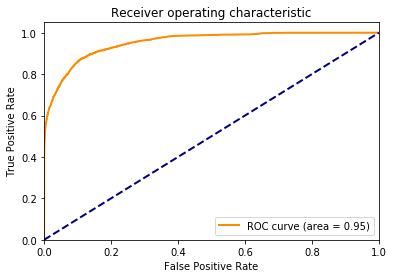

In [7]:
#Modèle retenu
model_rfc = RandomForestClassifier(
                n_estimators=100,       #Number of trees in the foret
                max_depth=16,           #Number of level in each decision tree
                min_samples_leaf= 1,    #Number of data points allow in a leaf node
                min_samples_split= 2,   #Number of data points placed in a node before the node is split
                max_features='sqrt',    #max number of features considered for splitting a node
                bootstrap=False)  

model_rfc.fit(X_train,Y_train)

fpr, tpr, thresholds = roc_curve(Y_train, model_rfc.predict_proba(X_train)[:,1])
print(' Auc : ', auc(fpr, tpr))
# Auc :  0.9542215970839263

roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

an = 0.0
mois = 0.1409657122035498
jour = 0.20204441028609185
lum = 0.06069523333338075
agg = 0.07300151007076244
catr = 0.10334655221611623
circ = 0.061313209322157815
prof = 0.05930460460007405
surf = 0.061350355366284005
infra = 0.04096129565305052
situ = 0.06238845511522196
nb_veh = 0.044549055134017766
nb_usagers = 0.09007960669929288


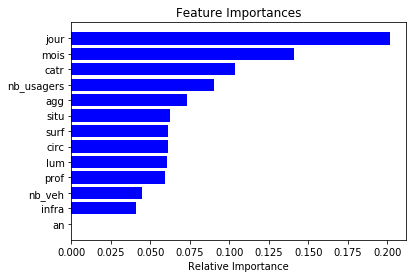

In [9]:
# Importance des variables
model_rfc.feature_importances_

for name, importance in zip(X_train.columns, model_rfc.feature_importances_):
    print(name, "=", importance)

features = X_train.columns
importances = model_rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()